<a href="https://colab.research.google.com/github/Predic-learning/Buiding-Energy/blob/main/Floor_Neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error
data = pd.read_csv('/content/drive/MyDrive/TempPredict/Fl-5.csv')
#data['Tools'].replace({'AIR':0, 'PC':1 , 'lamp':2}, inplace=True)
data.head()

,Class,Tools,Room,Number,BTU,Power,amount,PowerHr,time,SumPower
0,5,AIR,501,1872,38000,3.3,1,3.3,39,128.7
1,5,AIR,502,1873,38000,3.3,1,3.3,39,128.7
2,5,AIR,503,1874,38000,3.3,1,3.3,39,128.7
3,5,AIR,502,1869,38000,3.3,1,3.3,39,128.7
4,5,AIR,503,1870,38000,3.3,1,3.3,39,128.7


In [2]:
num_points = 368
max_error_percent = 20
randomP = [random.uniform(-3.3, 3.3) for _ in range(num_points)]
errorX = [valueX * (max_error_percent / 100) * random.choice([-1, 1]) for valueX in randomP]
dfX = pd.DataFrame({'random_dataX': errorX})
dfX['absolute_random_dataX'] = dfX['random_dataX'].abs()
random_Power = data['PowerHr'] - dfX['absolute_random_dataX']
data = data.assign(random_Power = random_Power)

randomS = [random.uniform(-128.7, 128.7) for _ in range(num_points)]
error = [value * (max_error_percent / 100) * random.choice([-1, 1]) for value in randomS]
df = pd.DataFrame({'random_data': error})
df['absolute_random_data'] = df['random_data'].abs()
random_SumPower = data['SumPower'] - df['absolute_random_data']
data = data.assign(random_SumPower = random_SumPower)
data

,Class,Tools,Room,Number,BTU,Power,amount,PowerHr,time,SumPower,random_Power,random_SumPower
0,5,AIR,501,1872,38000,3.30,1,3.300,39,128.70,2.672374,112.217086
1,5,AIR,502,1873,38000,3.30,1,3.300,39,128.70,3.060975,125.595351
2,5,AIR,503,1874,38000,3.30,1,3.300,39,128.70,2.950263,105.071187
3,5,AIR,502,1869,38000,3.30,1,3.300,39,128.70,2.897039,109.121866
4,5,AIR,503,1870,38000,3.30,1,3.300,39,128.70,3.133209,121.169334
5,5,AIR,504,1871,38000,3.30,1,3.300,39,128.70,3.076454,128.576828
6,5,AIR,503,1866,38000,3.30,1,3.300,36,118.80,3.256341,103.441849
7,5,AIR,504,1867,38000,3.30,1,3.300,36,118.80,2.972554,99.516423
8,5,AIR,505,1868,38000,3.30,1,3.300,36,118.80,3.019972,105.580392
9,5,AIR,504,1863,38000,3.30,1,3.300,30,99.00,3.070265,96.123510


In [3]:
#X = data[['PowerHr','time']].values
#y = data['SumPower'].values.reshape(-1, 1)
X = data[['time', 'random_Power']].values
y = data[['random_SumPower']].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)
X_train = torch.tensor(X_train).type(torch.float)
X_test = torch.tensor(X_test).type(torch.float)
y_train = torch.tensor(y_train).type(torch.float)
y_test = torch.tensor(y_test).type(torch.float)
X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype, y_train.shape

(torch.float32,
 torch.float32,
 torch.float32,
 torch.float32,
 torch.Size([17, 1]))

In [5]:
import torch.nn.functional as F
class Model(nn.Module):
   #1. model initailization
    def __init__(self, in_features, h1, h2, h3, out_features):
        super().__init__()
        self.layer1 = nn.Linear(in_features, h1)
        self.layer2 = nn.Linear(h1, h2)
        self.layer3 = nn.Linear(h2, h3)
        self.out = nn.Linear(h3, out_features)

# 2. How model works
    def forward(self,x):
       x = F.relu(self.layer1(x))
       x = F.relu(self.layer2(x))
       x = F.relu(self.layer3(x))
       x = self.out(x)
       return x
model = Model(2, 64, 128, 256, 1)
model

Model(
  (layer1): Linear(in_features=2, out_features=64, bias=True)
  (layer2): Linear(in_features=64, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=1, bias=True)
)

In [6]:
#หาค่าความถูกต้องของข้อมูล
def accuracy_fn(y_predict_class, y_true_class):
  correct = torch.sum(y_predict_class == y_true_class)
  return (correct/len(y_predict_class))*100

In [7]:
class RMSELoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.mse = nn.MSELoss()

    def forward(self,yhat,y):
        return torch.sqrt(self.mse(yhat,y))

criterion = RMSELoss()
#criterion = nn.L1Loss()
#criterion = nn.MSELoss()
#optimizer = torch.optim.SGD(model.parameters(), lr = 0.0001)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

In [8]:
# training loop RMSE
Epochs = 3000

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range (Epochs):
  y_pred = model(X_train)

  train_loss = criterion(y_pred, y_train)
  train_losses.append(train_loss.item())

  acc = r2_score(y_pred.detach().numpy(), y_train.detach().numpy())
  train_accuracies.append(acc)

  with torch.no_grad():
    y_test_pred = model(X_test)

    test_loss = criterion(y_test_pred, y_test)
    test_losses.append(test_loss.item())

    test_acc = r2_score(y_test_pred.detach().numpy(), y_test.detach().numpy())
    test_accuracies.append(test_acc)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    if epoch %100 == 0:
      print(f'Epoch: {epoch}, train_loss: {train_loss.item()}, test_loss:{test_loss.item()}, train_acc: {acc*100:.2f}%, test_acc:{test_acc*100:.2f}%')


Epoch: 0, train_loss: 1025.2484130859375, test_loss:114.9601058959961, train_acc: -210169274376.62%, test_acc:-6778057154.92%
Epoch: 100, train_loss: 1023.8576049804688, test_loss:113.1087875366211, train_acc: -123002584.13%, test_acc:-1777794.85%
Epoch: 200, train_loss: 1014.78173828125, test_loss:102.04232025146484, train_acc: -1975804.12%, test_acc:-25688.26%
Epoch: 300, train_loss: 984.0110473632812, test_loss:71.36399841308594, train_acc: -119997.25%, test_acc:-1152.30%
Epoch: 400, train_loss: 918.0777587890625, test_loss:49.69429397583008, train_acc: -14246.25%, test_acc:-84.47%
Epoch: 500, train_loss: 805.9909057617188, test_loss:99.96151733398438, train_acc: -2028.55%, test_acc:-116.53%
Epoch: 600, train_loss: 635.1341552734375, test_loss:170.9912567138672, train_acc: -248.36%, test_acc:-99.92%
Epoch: 700, train_loss: 414.233154296875, test_loss:241.5094757080078, train_acc: 48.05%, test_acc:-66.32%
Epoch: 800, train_loss: 185.98135375976562, test_loss:218.9317626953125, train_

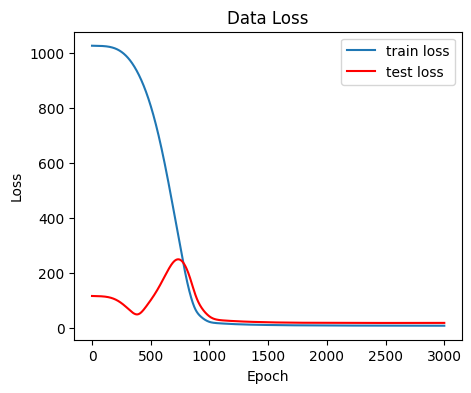

In [9]:
plt.figure(figsize=(5,4))
plt.plot(range(Epochs), train_losses, label='train loss')
plt.plot(range(Epochs), test_losses, 'r', label='test loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Data Loss")
plt.legend()

Text(0.5, 1.0, 'Accuracy')

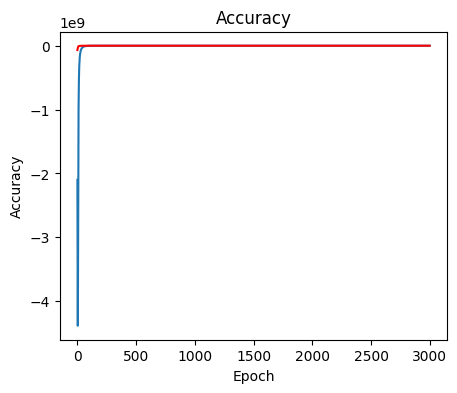

In [10]:
plt.figure(figsize=(5,4))
plt.plot(range(Epochs), train_accuracies, label='train loss')
plt.plot(range(Epochs), test_accuracies, 'r', label='test loss')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy")